In [8]:
import pandas as pd 

df = pd.read_csv('../data/final_df_clean.csv')
df.head()

,average_rating,year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,6.833333,2017,94.0,94.0,98.0,95.0,97.0,97.0,95.0,94.0,98.0,96.0,96.0,96.0,96.0,98.0,94.0,94.0,96.0,89.0
1,8.000000,2017,87.0,90.0,97.0,92.0,94.0,96.0,94.0,95.0,92.0,92.0,89.0,97.0,95.0,91.0,94.0,95.0,94.0,88.0
2,6.000000,2017,92.0,96.0,99.0,98.0,97.0,98.0,99.0,98.0,96.0,97.0,96.0,98.0,98.0,98.0,98.0,96.0,98.0,89.0
3,6.800000,2017,98.0,99.0,98.0,98.0,98.0,98.0,98.0,96.0,98.0,97.0,99.0,97.0,99.0,99.0,99.0,96.0,97.0,91.0
4,7.000000,2017,90.0,90.0,95.0,91.0,95.0,94.0,89.0,90.0,91.0,90.0,90.0,89.0,90.0,94.0,92.0,91.0,96.0,90.0


In [9]:
# copy of data with lagged features

lag = 1  
df_lag = df.copy()

for col in df.columns:
    if col not in ['Year', 'Pavement Rating']:
        df_lag[f'{col}_lag_{lag}'] = df_lag[col].shift(lag)

df_lag.dropna() 


,average_rating,year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q9_lag_1,Q10_lag_1,Q11_lag_1,Q12_lag_1,Q13_lag_1,Q14_lag_1,Q15_lag_1,Q16_lag_1,Q17_lag_1,Q18_lag_1
1,8.000000,2017,87.0,90.0,97.0,92.0,94.0,96.0,94.0,95.0,...,98.0,96.0,96.0,96.0,96.0,98.0,94.0,94.0,96.0,89.0
2,6.000000,2017,92.0,96.0,99.0,98.0,97.0,98.0,99.0,98.0,...,92.0,92.0,89.0,97.0,95.0,91.0,94.0,95.0,94.0,88.0
3,6.800000,2017,98.0,99.0,98.0,98.0,98.0,98.0,98.0,96.0,...,96.0,97.0,96.0,98.0,98.0,98.0,98.0,96.0,98.0,89.0
4,7.000000,2017,90.0,90.0,95.0,91.0,95.0,94.0,89.0,90.0,...,98.0,97.0,99.0,97.0,99.0,99.0,99.0,96.0,97.0,91.0
5,7.400000,2017,93.0,96.0,98.0,95.0,98.0,97.0,97.0,97.0,...,91.0,90.0,90.0,89.0,90.0,94.0,92.0,91.0,96.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,7.375000,2022,100.0,99.0,100.0,99.0,100.0,100.0,100.0,100.0,...,90.0,88.0,88.0,94.0,91.0,97.0,95.0,93.0,95.0,21.0
3918,7.478261,2022,96.0,94.0,98.0,93.0,98.0,93.0,93.0,93.0,...,100.0,99.0,99.0,100.0,99.0,100.0,99.0,99.0,99.0,8.0
3919,6.967742,2022,86.0,91.0,98.0,88.0,96.0,96.0,91.0,92.0,...,98.0,94.0,92.0,91.0,93.0,92.0,96.0,98.0,98.0,9.0
3920,6.992000,2022,82.0,75.0,92.0,81.0,100.0,93.0,93.0,93.0,...,94.0,87.0,97.0,89.0,89.0,92.0,94.0,89.0,93.0,26.0


In [10]:
# copy of data with rolling avgs

window = 3  
df_rolling = df.copy()

for col in df.columns:
    if col not in ['Year', 'Pavement Rating']:
        df_rolling[f'{col}_rolling_mean_{window}'] = df_rolling[col].rolling(window=window).mean()
        df_rolling[f'{col}_rolling_std_{window}'] = df_rolling[col].rolling(window=window).std()

df_rolling.dropna() 

,average_rating,year,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14_rolling_mean_3,Q14_rolling_std_3,Q15_rolling_mean_3,Q15_rolling_std_3,Q16_rolling_mean_3,Q16_rolling_std_3,Q17_rolling_mean_3,Q17_rolling_std_3,Q18_rolling_mean_3,Q18_rolling_std_3
2,6.000000,2017,92.0,96.0,99.0,98.0,97.0,98.0,99.0,98.0,...,95.666667,4.041452,95.333333,2.309401,95.000000,1.000000,96.000000,2.000000,88.666667,0.577350
3,6.800000,2017,98.0,99.0,98.0,98.0,98.0,98.0,98.0,96.0,...,96.000000,4.358899,97.000000,2.645751,95.666667,0.577350,96.333333,2.081666,89.333333,1.527525
4,7.000000,2017,90.0,90.0,95.0,91.0,95.0,94.0,89.0,90.0,...,97.000000,2.645751,96.333333,3.785939,94.333333,2.886751,97.000000,1.000000,90.000000,1.000000
5,7.400000,2017,93.0,96.0,98.0,95.0,98.0,97.0,97.0,97.0,...,96.666667,2.516611,96.000000,3.605551,94.666667,3.214550,96.666667,0.577350,91.000000,1.000000
6,8.428571,2017,86.0,88.0,96.0,91.0,93.0,90.0,90.0,89.0,...,96.000000,1.732051,93.666667,2.886751,93.333333,3.214550,95.666667,1.527525,92.333333,2.516611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,7.375000,2022,100.0,99.0,100.0,99.0,100.0,100.0,100.0,100.0,...,97.000000,3.000000,97.333333,2.081666,96.666667,3.214550,97.333333,2.081666,19.666667,11.060440
3918,7.478261,2022,96.0,94.0,98.0,93.0,98.0,93.0,93.0,93.0,...,96.333333,4.041452,96.666667,2.081666,96.666667,3.214550,97.333333,2.081666,12.666667,7.234178
3919,6.967742,2022,86.0,91.0,98.0,88.0,96.0,96.0,91.0,92.0,...,94.666667,4.618802,96.333333,2.516611,95.333333,5.507571,96.666667,3.214550,14.333333,10.115994
3920,6.992000,2022,82.0,75.0,92.0,81.0,100.0,93.0,93.0,93.0,...,88.666667,5.773503,96.666667,3.055050,85.333333,14.843629,94.333333,3.214550,30.333333,23.797759


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  
    ("scaler", RobustScaler()) 
])

#### Data Selection

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

y_df = df['average_rating']  
X_df = df.drop(columns=['average_rating'])
X_df_lag = df_lag.drop(columns=['average_rating'])
y_lag = df_lag['average_rating']  
X_df_rolling = df_rolling.drop(columns=['average_rating'])
y_rolling = df_rolling['average_rating']  

tscv = TimeSeriesSplit(n_splits=5)
lr_model = LinearRegression()

def evaluate_model(X, y, model, tscv, preprocessor):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    mae_scores = cross_val_score(pipeline, X, y, cv=tscv, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X, y, cv=tscv, scoring='r2')
    
    return mae_scores, r2_scores

mae_original, r2_original = evaluate_model(X_df, y_df, lr_model, tscv, preprocessor)
mae_lag, r2_lag = evaluate_model(X_df_lag, y_lag, lr_model, tscv, preprocessor)
mae_rolling, r2_rolling = evaluate_model(X_df_rolling, y_rolling, lr_model, tscv, preprocessor)

print(f"Original Data (df) - MAE: {-mae_original.mean():.4f} (±{mae_original.std():.4f}), R²: {r2_original.mean():.4f} (±{r2_original.std():.4f})")
print(f"Lag Data (df_lag) - MAE: {-mae_lag.mean():.4f} (±{mae_lag.std():.4f}), R²: {r2_lag.mean():.4f} (±{r2_lag.std():.4f})")
print(f"Rolling Data (df_rolling) - MAE: {-mae_rolling.mean():.4f} (±{mae_rolling.std():.4f}), R²: {r2_rolling.mean():.4f} (±{r2_rolling.std():.4f})")

Original Data (df) - MAE: 0.3834 (±0.1017), R²: -0.5902 (±0.8413)
Lag Data (df_lag) - MAE: 0.3721 (±0.0992), R²: -0.5092 (±0.7124)
Rolling Data (df_rolling) - MAE: 67776056201.5699 (±135552112402.4827), R²: -604409889282383402762240.0000 (±1208819778564766805524480.0000)


Based on these results, we will use our data with lagged features.

#### Model Selection

In [13]:
X = X_df_lag
y = y_lag

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

tscv = TimeSeriesSplit(n_splits=5)

mae_scores_ts = cross_val_score(rf_pipeline, X, y, cv=tscv, scoring='neg_mean_absolute_error')
r2_scores_ts = cross_val_score(rf_pipeline, X, y, cv=tscv, scoring='r2')

print(f"TimeSeriesSplit MAE: {-mae_scores_ts.mean():.4f} (±{mae_scores_ts.std():.4f})")
print(f"TimeSeriesSplit R²: {r2_scores_ts.mean():.4f} (±{r2_scores_ts.std():.4f})")

TimeSeriesSplit MAE: 0.3371 (±0.1085)
TimeSeriesSplit R²: -0.1179 (±0.0936)


In [17]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [18]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

mae_scores_xgb = cross_val_score(xgb_pipeline, X, y, cv=tscv, scoring='neg_mean_absolute_error')
r2_scores_xgb = cross_val_score(xgb_pipeline, X, y, cv=tscv, scoring='r2')

print(f"XGBoost TimeSeriesSplit MAE: {-mae_scores_xgb.mean():.4f} (±{mae_scores_xgb.std():.4f})")
print(f"XGBoost TimeSeriesSplit R²: {r2_scores_xgb.mean():.4f} (±{r2_scores_xgb.std():.4f})")

XGBoost TimeSeriesSplit MAE: 0.4096 (±0.0900)
XGBoost TimeSeriesSplit R²: -0.7692 (±0.6625)


In [19]:
from sklearn.svm import SVR

svr_model = SVR()

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', svr_model)
])

mae_scores_svr = cross_val_score(svr_pipeline, X, y, cv=tscv, scoring='neg_mean_absolute_error')
r2_scores_svr = cross_val_score(svr_pipeline, X, y, cv=tscv, scoring='r2')

print(f"SVR TimeSeriesSplit MAE: {-mae_scores_svr.mean():.4f} (±{mae_scores_svr.std():.4f})")
print(f"SVR TimeSeriesSplit R²: {r2_scores_svr.mean():.4f} (±{r2_scores_svr.std():.4f})")

SVR TimeSeriesSplit MAE: 0.3686 (±0.0879)
SVR TimeSeriesSplit R²: -0.4272 (±0.3320)


In [20]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [21]:
df_lag_clean = df_lag.dropna(subset=[col for col in df_lag.columns if 'lag' in col])

X_clean = df_lag_clean.drop(columns=['average_rating'])
y_clean = df_lag_clean['average_rating']

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, r2_score

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_clean)

def create_sequences(data, target, time_steps=1):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 3 
X_seq, y_seq = create_sequences(X_scaled, y_clean, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(units=1)) 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Epoch 1/50


2024-11-13 22:52:09.684383: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.2009
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6676
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6422
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5793
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5962
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6023 
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5558
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5499
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5340
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5475
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5303
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5399
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5511
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5259
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5208
Epoch 16/50
98/98 ━━━━━━━━━━

#### Hyperparameters for LSTM

In [23]:
!pip install keras-tuner


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [24]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_lstm_layers', 1, 2)):  
        model.add(
            LSTM(
                units=hp.Int('lstm_units', min_value=50, max_value=150, step=50),  
                return_sequences=(i < hp.get('num_lstm_layers') - 1), 
                input_shape=(X_train.shape[1], X_train.shape[2]) if i == 0 else None
            )
        )
        model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))  

    model.add(Dense(units=1))  
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=0.0001, max_value=0.001, step=0.0001)),
        loss='mean_squared_error'
    )
    
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',  
    factor=3,  
    directory='my_dir',  
    project_name='lstm_tuning'
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])


Reloading Tuner from my_dir/lstm_tuning/tuner0.json


In [25]:
best_model = tuner.get_best_models(num_models=1)[0]

loss = best_model.evaluate(X_test, y_test)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best model loss: {loss:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1295 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Best model loss: 0.1772
MAE: 0.3130
R²: -0.0003


In [26]:
best_hp = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters
print("Best hyperparameters: ", best_hp.values)

Best hyperparameters:  {'num_lstm_layers': 2, 'lstm_units': 50, 'dropout_rate': 0.4, 'learning_rate': 0.0009000000000000001, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}


- **Number of LSTM layers:** 2
- **LSTM units:** 50
- **Dropout rate:** 0.4
- **Learning rate:** 0.0009

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(columns=['average_rating']) 
y = df['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.25489566821831827
R^2 Score: 0.03281009208827801


   Feature  Importance
18     Q18    0.090443
0     year    0.080264
2       Q2    0.058122
16     Q16    0.057274
1       Q1    0.054458
14     Q14    0.053787
10     Q10    0.052869
11     Q11    0.051489
13     Q13    0.051027
4       Q4    0.050787
15     Q15    0.048265
9       Q9    0.047859
5       Q5    0.047581
17     Q17    0.046331
12     Q12    0.043671
8       Q8    0.043541
6       Q6    0.041215
3       Q3    0.040904
7       Q7    0.040115


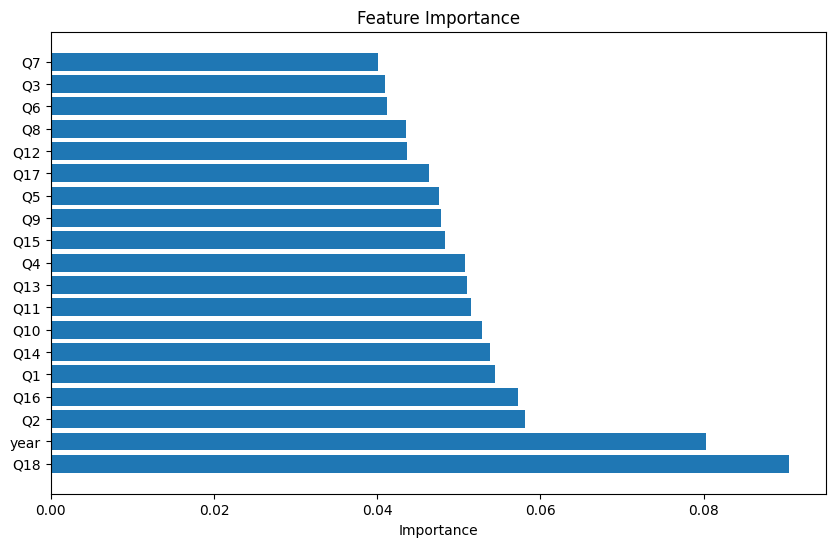

In [31]:
import matplotlib.pyplot as plt
feature_importances = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()